In [1]:
import os

import pandas as pd

import process_times

In [2]:
CIRCUIT_NAME = "imola"
CIRCUIT_COUNTRY = "italy"
CIRCUIT_CITY = "imola"
GP_WEEKS = [15,16]
FIGURES_PATH = os.path.join("..", "figures", CIRCUIT_NAME)
TEAM_COLORS = {
    "Mercedes":"#00D2BE",
    "Custom":(22.6/255.0, 21.1/255.0, 29.0/255.0),
    "Mc Laren":"#FF8700",
    "Ferrari":"#DC0000",
    "Red Bull":"#0600EF",
    "Alpine":"#0090FF",
    "Aston Martin":"#006F62",
    "Haas":"#8c8c8c",
    "Williams":"#005AFF",
    "Alfa Romeo":"#900000",
    "AlphaTauri":"#2B4562",
}

In [3]:
if not os.path.exists(os.path.join("..", "figures")):
    os.mkdir(os.path.join("..", "figures"))
if not os.path.exists(FIGURES_PATH):
    os.mkdir(FIGURES_PATH)

In [4]:
df = process_times.read_and_filter_csv(os.path.join("..", "data", f"{CIRCUIT_NAME}.csv"))
df

,frame,name,time,date,custom,tc,gear,brakes,team,time_s
0,145,VaientinBruff,1:13.075,2021-11-30,Yes,0,0,0,Alpine,73.075
1,148,MarcelKiefer,1:13.097,2022-04-24,Yes,0,0,0,Red Bull,73.097
2,151,VeloceVasterrac,1:13.120,2021-10-29,Yes,0,0,0,Red Bull,73.120
3,155,DaniMoreno,1:13.128,2021-12-02,Yes,0,0,0,Mercedes,73.128
4,158,Joshidowu,1:13.137,2021-11-30,Yes,0,0,0,Mc Laren,73.137
...,...,...,...,...,...,...,...,...,...,...
46659,190266,cactus,1:16.617,2021-12-16,Yes,0,0,0,Mercedes,76.617
46660,190256,asvensson,1:16.617,2021-10-15,Yes,0,0,1,Red Bull,76.617
46661,190279,yeetDoi,1:16.617,2021-10-15,No,0,0,0,Red Bull,76.617
46662,190249,CptBalloonhands,1:16.617,2022-04-12,No,1,1,1,Alpine,76.617


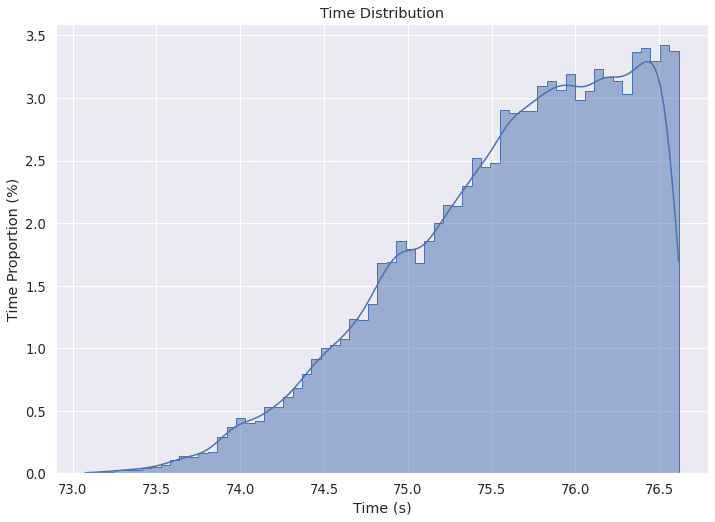

In [5]:
process_times.plot_time_dist(df, FIGURES_PATH)

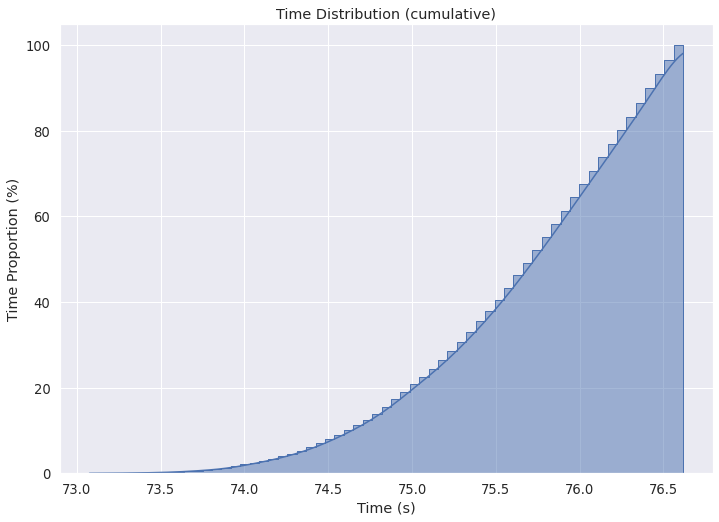

In [6]:
process_times.plot_cum_time_dist(df, FIGURES_PATH)

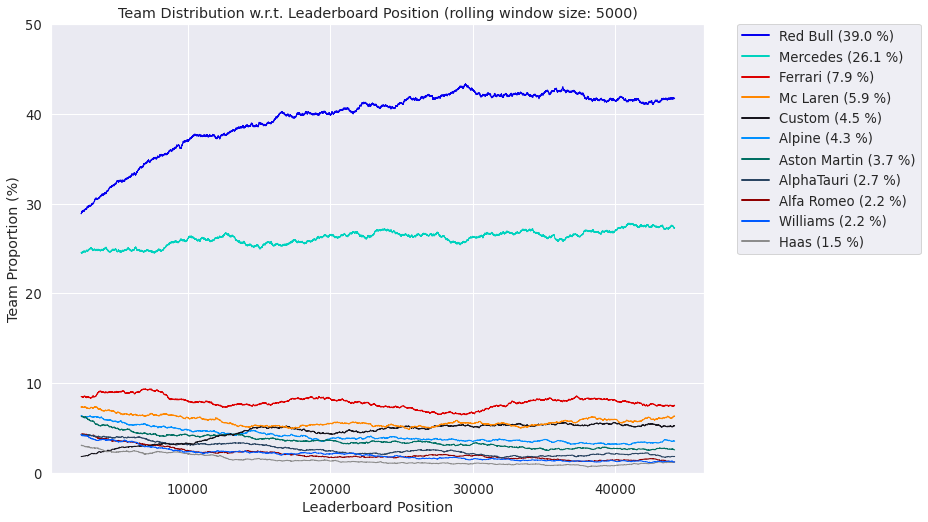

In [7]:
process_times.plot_team_dist(df, FIGURES_PATH)

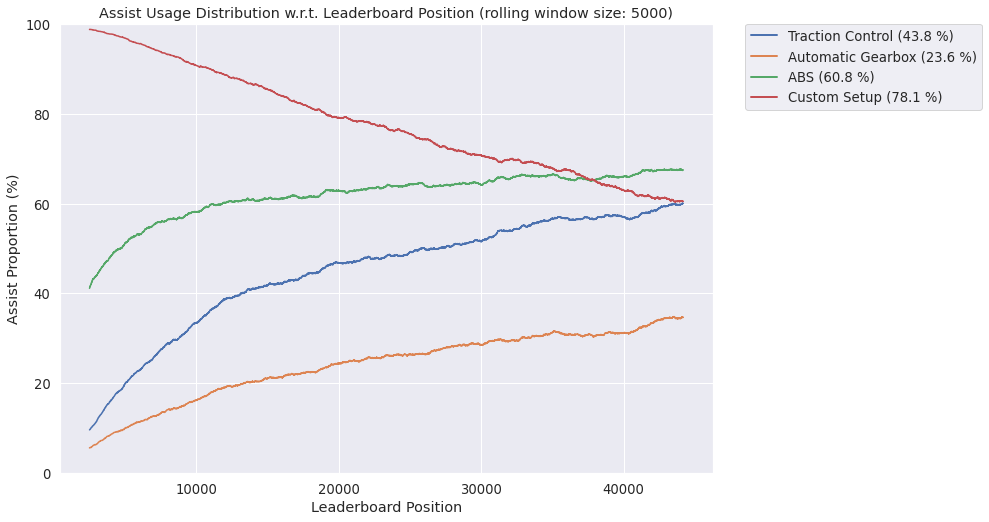

In [8]:
process_times.plot_assist_dist(df, FIGURES_PATH)

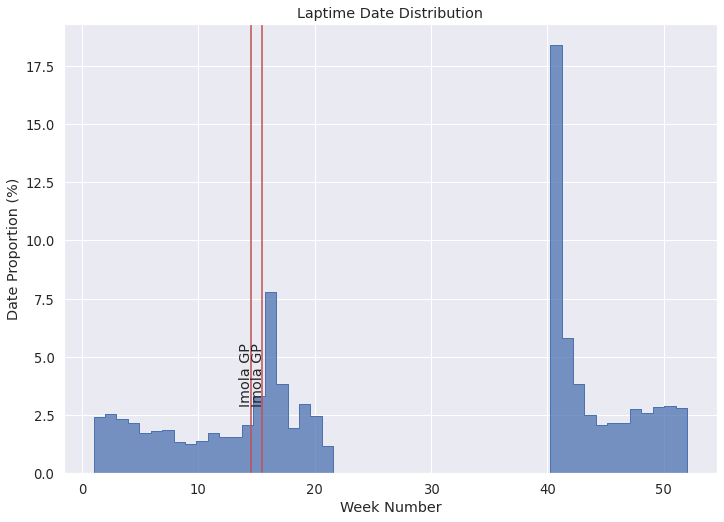

In [9]:
process_times.plot_weekday(df, CIRCUIT_NAME, GP_WEEKS, FIGURES_PATH)

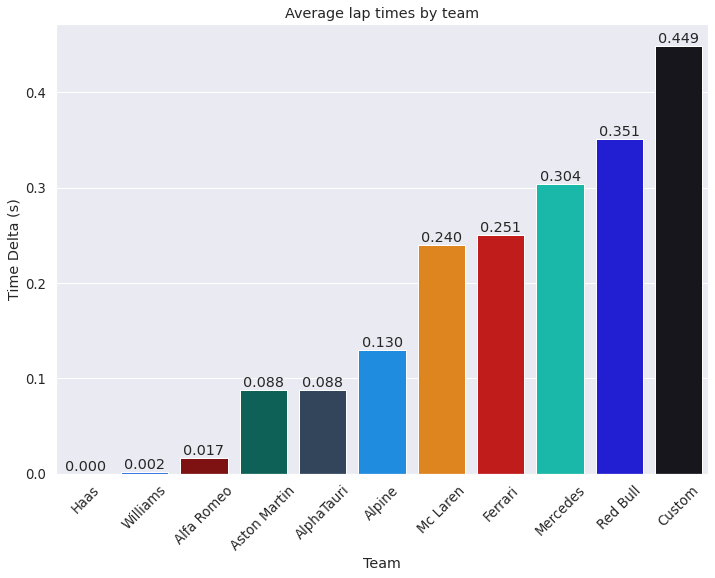

In [10]:
process_times.plot_team_times(df, FIGURES_PATH)

In [11]:
process_times.generate_html(CIRCUIT_NAME, CIRCUIT_COUNTRY, CIRCUIT_CITY)